# <p style="background-color:orange;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:10px 10px;"><b>Support Vector Machines (SVM) - Explaining Hyper Parameters</b></p>

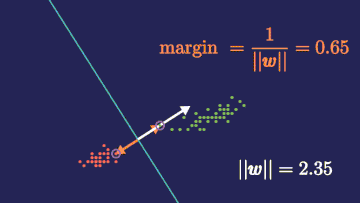

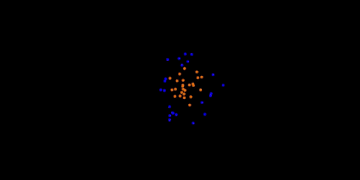

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


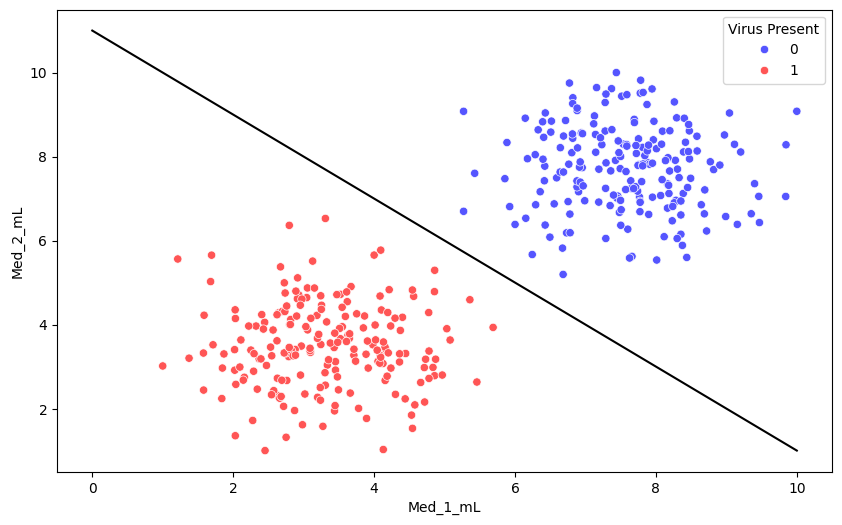

In [8]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present',palette='seismic')
x = np.linspace(0, 10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, "black");

## SVM

In [10]:
from sklearn.svm import SVC

In [11]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

## Hyper Parameters
### C

In [12]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [15]:
model = SVC(kernel="linear", C=1)

In [16]:
model.fit(X, y)

SVC(C=1, kernel='linear')

In [17]:
from svm_margin_plot import plot_svm_boundary

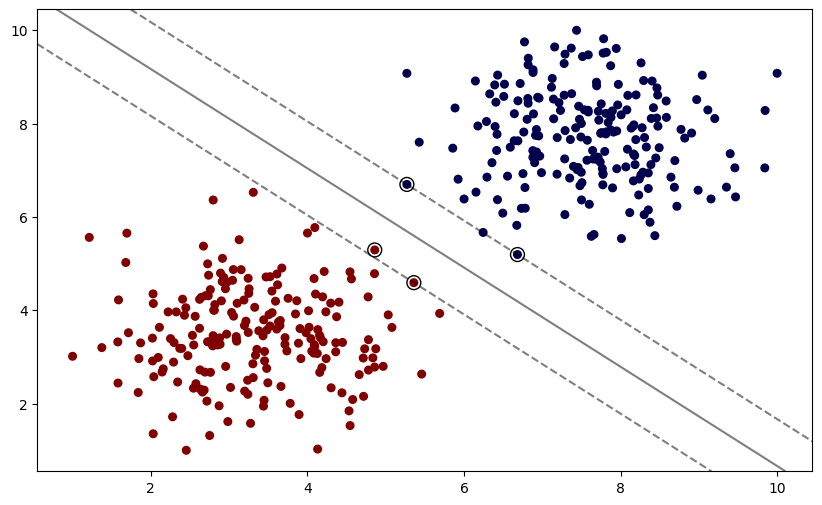

In [18]:
plot_svm_boundary(model, X, y)

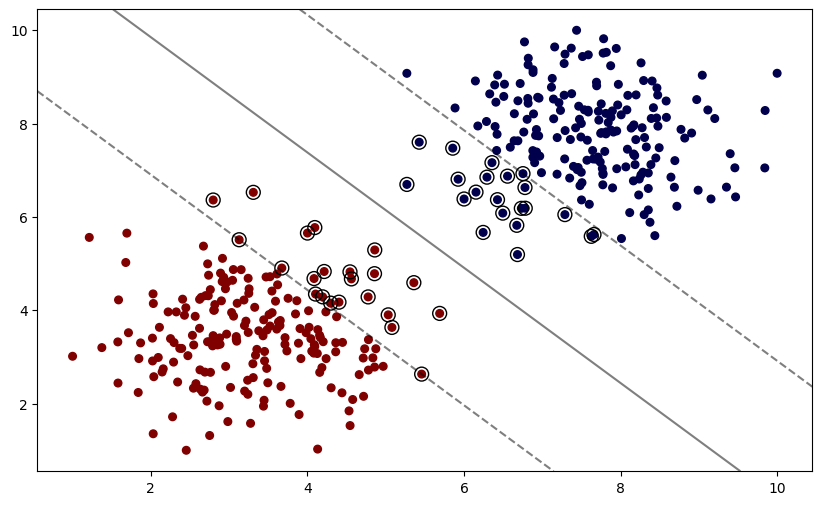

In [19]:
model = SVC(kernel="linear", C=0.01) # soft margin
model.fit(X, y)
plot_svm_boundary(model, X, y)

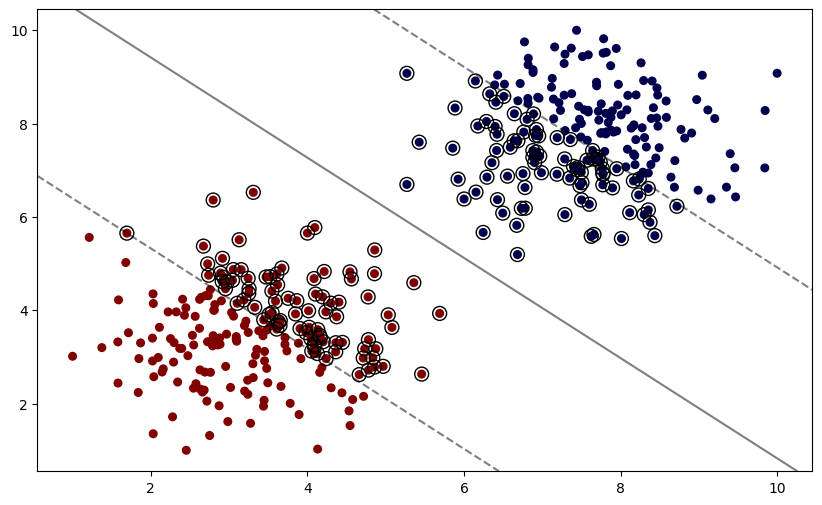

In [20]:
model = SVC(kernel="linear", C=0.001) # soft margin
model.fit(X, y)
plot_svm_boundary(model, X, y)

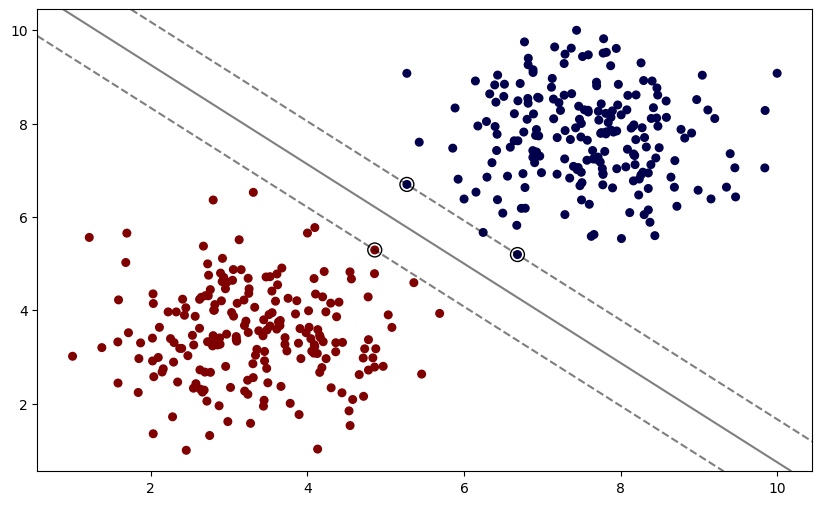

In [21]:
model = SVC(kernel="linear", C=10) # hard margin
model.fit(X, y)
plot_svm_boundary(model, X, y)

## Gamma

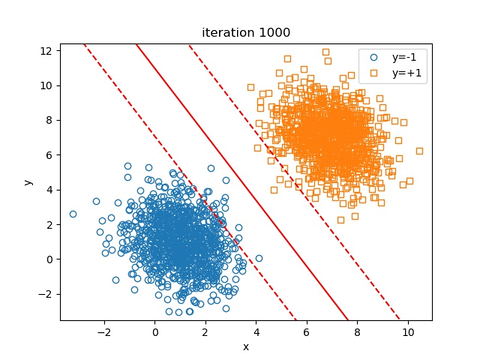
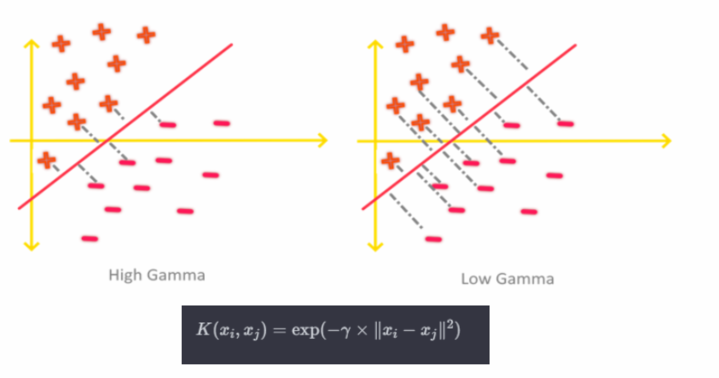

Yüksek Gamma Değeri:<br>
Yüksek gamma değeri, çekirdek fonksiyonunun sadece çok yakın veri noktalarına odaklanmasına neden olur.
Bu, modelin eğitim verilerine çok yakın uyum sağlamasına (overfitting) yol açabilir. Yani model, eğitim verilerindeki küçük detayları ve gürültüyü öğrenir, ancak genelleme yeteneği düşer.
Model, eğitim veri setindeki özel durumları öğrenir ama yeni, görülmemiş verilere karşı kötü performans gösterebilir.<br>
Düşük Gamma Değeri:<br>
Düşük gamma değeri, çekirdek fonksiyonunun daha geniş bir alandaki veri noktalarını kapsamasına neden olur.
Bu durum, modelin daha geniş özelliklere dayanarak karar vermesine ve daha iyi genelleme yapmasına yardımcı olabilir.
Ancak, çok düşük bir gamma değeri, modelin aşırı genelleme yapmasına (underfitting) ve eğitim verilerindeki önemli özellikleri gözden kaçırmasına neden olabilir.

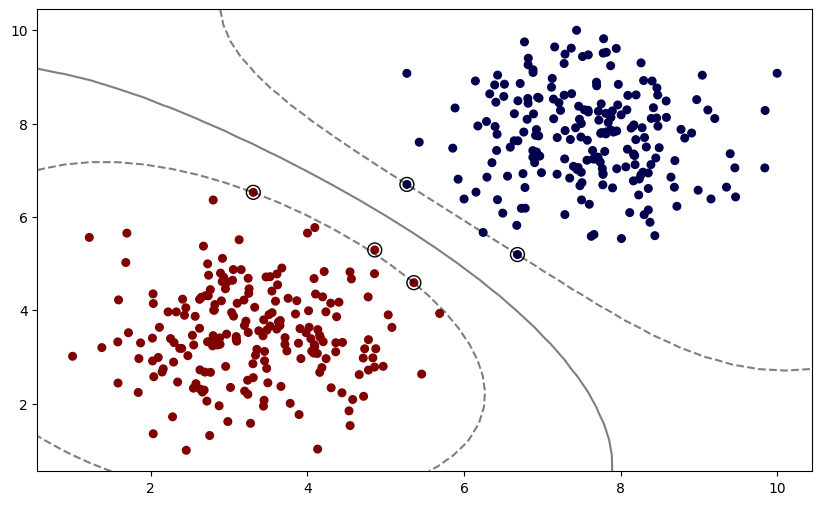

In [26]:
model = SVC(kernel="rbf", C=10, gamma=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [27]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = 